In [1]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans  

In [3]:
X = np.array([
             [15,30,22],  
             [99,88,13],
             [15,12,22],
             [24,10,22],
             [30,45,77],
             [85,70,77],
             [71,80,77],
             [60,78,13],
             [55,52,22],
             [80,91,22],
])

In [4]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
print(kmeans.cluster_centers_)  

[[ 62.          65.          77.        ]
 [ 73.5         77.25        17.5       ]
 [ 18.          17.33333333  22.        ]]


In [6]:
print(kmeans.labels_)

[2 1 2 2 0 0 0 1 1 1]


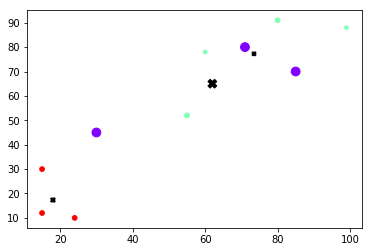

In [7]:
plt.scatter(X[:,0], X[:,1], X[:,2], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], color='black', marker='X')  

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [ ]:
#number of points per group
n = 50

#define group labels and their centers
groups = {'A': (2,2),
          'B': (3,4),
          'C': (4,4),
          'D': (4,1)}

#create labeled x and y data
data = pd.DataFrame(index=range(n*len(groups)), columns=['x','y','label'])
for i, group in enumerate(groups.keys()):
    #randomly select n datapoints from a gaussian distrbution
    data.loc[i*n:((i+1)*n)-1,['x','y']] = np.random.normal(groups[group], [0.5,0.5], [n,2])
    #add group labels
    data.loc[i*n:((i+1)*n)-1,['label']] = group

data.head()

In [ ]:
#create a new figure
plt.figure(figsize=(5,5))

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #add data points 
    plt.scatter(x=data.loc[data['label']==label, 'x'], 
                y=data.loc[data['label']==label,'y'], 
                color=customPalette[i], 
                alpha=0.33)
    
    #add label
    plt.annotate(label, 
                 data.loc[data['label']==label,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color=customPalette[i])